Dallin Nielson\
DSC 530 - Data Exploration and Analysis\
Week 4 Exercises

# Exercises 3-1

Something like the *class size paradox* occurs if you ask children how many family members they have. Families with many children are more likely to show up in the sample (because they have more chances of being selected), and families with no children don't have any chance of showing up in the sample.

#### 1. Use the NFSG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

In [1]:
# Change to the directory containing the packages

import os
os.chdir(r'C:\Users\dalli\OneDrive\Documents\Education\DSC 530 - Data Exploration and Analysis\ThinkStats2\code')

In [2]:
import nsfg
import thinkplot
import numpy as np
import pandas as pd
from thinkstats2 import Pmf
from thinkstats2 import Cdf

In [3]:
# Read the FemResp data and get the value counts for NUMKDHH
resp = nsfg.ReadFemResp()
children =  resp['numkdhh'].value_counts().sort_index()
n = sum(children)

# Get the actual PMF
actual_pmf = Pmf({key: value / n for key, value in children.items()}, "Actual")
print(actual_pmf.Items())

dict_items([(0, 0.46617820227659296), (1, 0.21405207379301322), (2, 0.19625801386889966), (3, 0.08713855815779144), (4, 0.025644380478869553), (5, 0.01072877142483318)])


#### 2. Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

In [4]:
# Get the Biased PMF
biased_pmf = Pmf(
    {key:(key * value) / n for key, value in children.items()}, "Observed")
print(biased_pmf.Items())

dict_items([(0, 0.0), (1, 0.20899335717935616), (2, 0.38323965252938175), (3, 0.25523760858456823), (4, 0.10015329586101175), (5, 0.052376085845682166)])


#### 3. Plot the actual and biased distributions, and compute their means.

Actual mean:    1.02
Observed mean:  2.4


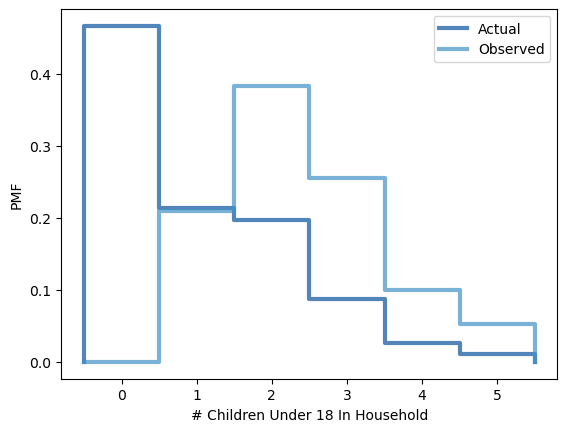

In [5]:
# Plot the distributions
thinkplot.PrePlot(2)
thinkplot.Pmfs([actual_pmf, biased_pmf])
thinkplot.Config(xlabel="# Children Under 18 In Household", ylabel="PMF")

# Compute the Means
print(f'Actual mean:    {round(actual_pmf.Mean(), 2)}')
print(f'Observed mean:  {round(biased_pmf.Mean(), 2)}')

# Exercises 3-2

#### 1. Write functions called `PmfMean` and `PmfVar` that take a `Pmf` object as an input and computes the mean/variance.

In [6]:
def PmfMean(pmfObj):
    "Takes a thinkstats2 Pmf object and returns its mean."
    
    try:  # Ensure the pmfObj parameter is a Pmf object
        assert type(pmfObj) == Pmf
    
    except AssertionError:
        raise AssertionError(
            "The argument passed to PmfMean is not a thinkstats2 Pmf object."
        )
    
    # Return the mean of the PMF Object
    return sum(p * value for value, p in pmfObj.Items())
    

def PmfVar(pmfObj):
    "Takes a thinkstats2 Pmf object and returns its variance."
    
    try:  # Ensure the pmfObj parameter is a Pmf object
        assert type(pmfObj) == Pmf
        
    except AssertionError:
        raise AssertionError(
            "The argument passed to PmfVar is not a thinkstats2 Pmf object."
        )
    
    # Get the mean and return the variance
    mean = PmfMean(pmfObj)
    return sum(p * (value - mean) ** 2 for value, p in pmfObj.Items())

#### 2. Check that the functions are consistent with the `mean` and `var` Pmf class functions

In [7]:
# Compare the Mean functions
print('Mean from my PmfMean function: ', PmfMean(actual_pmf))
print('Mean from thinkstats2 Pmf class function: ', actual_pmf.Mean())
print('Mean functions are consistent: ', PmfMean(actual_pmf) == actual_pmf.Mean())

Mean from my PmfMean function:  1.024205155043831
Mean from thinkstats2 Pmf class function:  1.024205155043831
Mean functions are consistent:  True


In [8]:
# Compare the Variance functions
print('Variance from my PmfVar function: ', PmfVar(actual_pmf))
print('Variance from thinkstats2 Pmf class function: ', actual_pmf.Var())
print('Variance functions are consistent: ', PmfVar(actual_pmf) == actual_pmf.Var())

Variance from my PmfVar function:  1.4128643263531193
Variance from thinkstats2 Pmf class function:  1.4128643263531193
Variance functions are consistent:  True


# Exercises 4-1

#### 1. How much did you weigh at birth?
I weighed 8 lbs. 4 oz., or 8.25 pounds

#### 2. Using the NSFG data (for live births), compute the distribution of birth weights and use it to find your percentile rank.

In [9]:
# Read in the Pregnancy data and get the live births
preg = nsfg.ReadFemPreg()
nsfg.CleanFemPreg(preg)
live_births = preg[preg.outcome==1]

# Get the CDF for birth weight and find the percentile rank for my weight
weight_cdf = Cdf(live_births['totalwgt_lb'])
my_weight = 8.25
my_rank = weight_cdf.PercentileRank(my_weight)
print(f'{my_weight} pounds is at Percentile Rank {round(my_rank, 2)} for all births.')

8.25 pounds is at Percentile Rank 78.69 for all births.


#### 3. If you were a firstborn baby, find your percentile rank in the distribution for firstborn babies. Otherwise, find your percentile rank in the distribution for non-firstborn babies.

In [10]:
# Get the data for firstborn live births
firstborns = live_births[live_births['birthord']==1]

# Get the CDF for firstborn birthweight and find my percentile rank
fb_weight_cdf = Cdf(firstborns['totalwgt_lb'])
my_fb_rank = fb_weight_cdf.PercentileRank(my_weight)
print(f'{my_weight} pounds is at Percentile Rank {round(my_rank, 2)} for firstborn births.')

8.25 pounds is at Percentile Rank 78.69 for firstborn births.


#### 4. If you are in the 90th percentile or higher, call your mother and apologize.
I am lower than the 90th percentile, but I found out that one of my brothers came in at the 94th percentile weighing 9.1875 pounds, so I will be sure to inform him that he needs to apologize :)

# Exercises 4-2

#### 1. Generate 1000 numbers from `numpy.random.random` and plot their PMF and CDF.

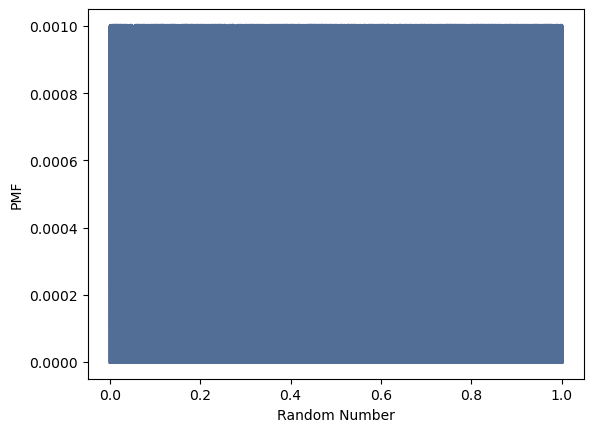

In [11]:
# Generate the random numbers
rand_nums = np.random.random(size=1000)

# Plot the PMF
rand_pmf = Pmf(rand_nums)
thinkplot.Pmfs([rand_pmf])
thinkplot.Config(xlabel="Random Number", ylabel="PMF")

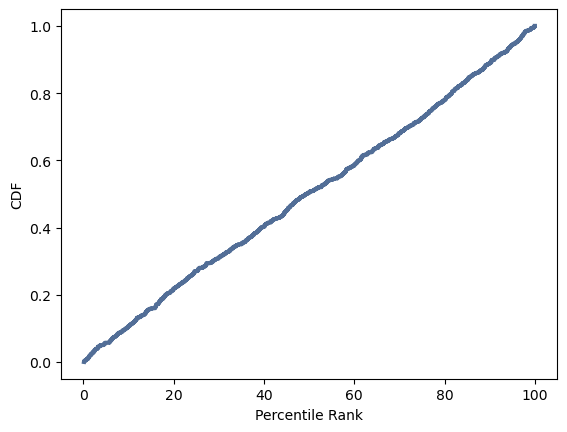

In [12]:
# Plot the CDF
rand_cdf = Cdf([n * 100 for n in rand_nums])
thinkplot.Cdf(rand_cdf)
thinkplot.Config(xlabel="Percentile Rank", ylabel="CDF")

#### 2. Are the distributions random?
Yes, we can tell that the distributions are random because the PMF chart is essentially a flat line (with all values having around the same probability), and the CDF distribution is a straight diaganol line.